<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/%EA%B8%B0%EC%98%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

07.12<BR>
hospital EDA

In [6]:
require(dplyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 패키지 및 데이터 로드

In [23]:
#system("gdown --id 1f-pqUZfDa9zTIa8aTmS9LdKuPuJKdIaq") # 기온
system("gdown --id 1C--yFaAMBZWQ-VPrBOZFJms8DphBlCIu") # 관측지점

In [24]:
기상관측지점=read.csv("종관기상관측_ASOS_지점.csv")
기온= read.csv("ASOS_기온.csv")

In [7]:
기온 %>% head

,db_sfc_ta_dd.tma,db_sfc_ta_dd.stn_id,db_sfc_ta_dd.avg_ta,db_sfc_ta_dd.avg_ta_qcflg,db_sfc_ta_dd.avg_ta_crob,db_sfc_ta_dd.avg_ta_calc_dtnb,db_sfc_ta_dd.max_ta,db_sfc_ta_dd.max_ta_qcflg,db_sfc_ta_dd.max_ta_crob,db_sfc_ta_dd.max_ta_hrmt,⋯,db_sfc_ta_dd.avg_ta_stcs_calc_flag,db_sfc_ta_dd.max_ta_hrmt_srv_yn,db_sfc_ta_dd.max_ta_hrmt_stcs_calc_flag,db_sfc_ta_dd.max_ta_srv_yn,db_sfc_ta_dd.max_ta_stcs_calc_flag,db_sfc_ta_dd.min_ta_hrmt_srv_yn,db_sfc_ta_dd.min_ta_hrmt_stcs_calc_flag,db_sfc_ta_dd.min_ta_srv_yn,db_sfc_ta_dd.min_ta_stcs_calc_flag,db_sfc_ta_dd.orgn_stn_id
,<chr>,<int>,<dbl>,<int>,<lgl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<int>,<lgl>
1,2012-01-01 00:00:00.0,104,0.0,NA,NA,8,4.0,NA,NA,1320,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
2,2012-01-01 00:00:00.0,106,1.6,NA,NA,8,5.3,NA,NA,1220,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
3,2012-01-01 00:00:00.0,112,-2.3,NA,NA,8,1.3,NA,NA,1,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
4,2012-01-01 00:00:00.0,115,1.9,NA,NA,8,4.3,NA,NA,1411,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
5,2012-01-01 00:00:00.0,121,-2.8,NA,NA,8,1.8,NA,NA,1338,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
6,2012-01-01 00:00:00.0,127,-2.8,NA,NA,8,1.7,NA,NA,1231,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA


In [26]:
기상관측지점 %>% head

,지점번호,경도.degree.,위도.degree.,노장해발고도.m.,지점명.한글.,예보구역코드,법정동코드
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,90,128.5647,38.25085,18.10,속초,11D20401,4282033035
2,95,127.3042,38.14788,154.81,철원,11D10101,4278025624
3,98,127.0607,37.90186,112.50,동두천,11B20401,4125010300
4,99,126.7665,37.88588,29.40,파주,11B20305,4148025025
5,100,128.7183,37.67713,772.60,대관령,11D20201,4276037025
6,101,127.7357,37.90256,75.64,춘천,11D10301,4211011800


# 변수명 변경

In [8]:
require(stringr)

Loading required package: stringr



In [9]:
nchar = nchar("db_sfc_ta_dd.")
names(기온)= str_sub(names(기온),nchar+1)

In [30]:
기온 %>% head(50)

,db_sfc_ta_dd.tma,db_sfc_ta_dd.stn_id,db_sfc_ta_dd.avg_ta,db_sfc_ta_dd.avg_ta_qcflg,db_sfc_ta_dd.avg_ta_crob,db_sfc_ta_dd.avg_ta_calc_dtnb,db_sfc_ta_dd.max_ta,db_sfc_ta_dd.max_ta_qcflg,db_sfc_ta_dd.max_ta_crob,db_sfc_ta_dd.max_ta_hrmt,⋯,db_sfc_ta_dd.avg_ta_stcs_calc_flag,db_sfc_ta_dd.max_ta_hrmt_srv_yn,db_sfc_ta_dd.max_ta_hrmt_stcs_calc_flag,db_sfc_ta_dd.max_ta_srv_yn,db_sfc_ta_dd.max_ta_stcs_calc_flag,db_sfc_ta_dd.min_ta_hrmt_srv_yn,db_sfc_ta_dd.min_ta_hrmt_stcs_calc_flag,db_sfc_ta_dd.min_ta_srv_yn,db_sfc_ta_dd.min_ta_stcs_calc_flag,db_sfc_ta_dd.orgn_stn_id
,<chr>,<int>,<dbl>,<int>,<lgl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<int>,<lgl>
1,2012-01-01 00:00:00.0,104,0.0,NA,NA,8,4.0,NA,NA,1320,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
2,2012-01-01 00:00:00.0,106,1.6,NA,NA,8,5.3,NA,NA,1220,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
3,2012-01-01 00:00:00.0,112,-2.3,NA,NA,8,1.3,NA,NA,1,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
4,2012-01-01 00:00:00.0,115,1.9,NA,NA,8,4.3,NA,NA,1411,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
5,2012-01-01 00:00:00.0,121,-2.8,NA,NA,8,1.8,NA,NA,1338,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
6,2012-01-01 00:00:00.0,127,-2.8,NA,NA,8,1.7,NA,NA,1231,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
7,2012-01-01 00:00:00.0,129,-1.0,NA,NA,8,1.0,NA,NA,1446,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
8,2012-01-01 00:00:00.0,133,-1.1,NA,NA,8,1.4,NA,NA,1006,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA
9,2012-01-01 00:00:00.0,140,-0.6,NA,NA,8,2.0,NA,NA,1113,⋯,1,NA,NA,NA,4,NA,NA,NA,4,NA


# 기온 - 시각(PK), 지점번호(PK), 평균기온, 최고기온, 최저기온 

In [18]:
#require(magrittr)
install.packages("DataExplorer")
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [16]:
기온 %<>% select( tma,stn_id,avg_ta,max_ta,min_ta ) 

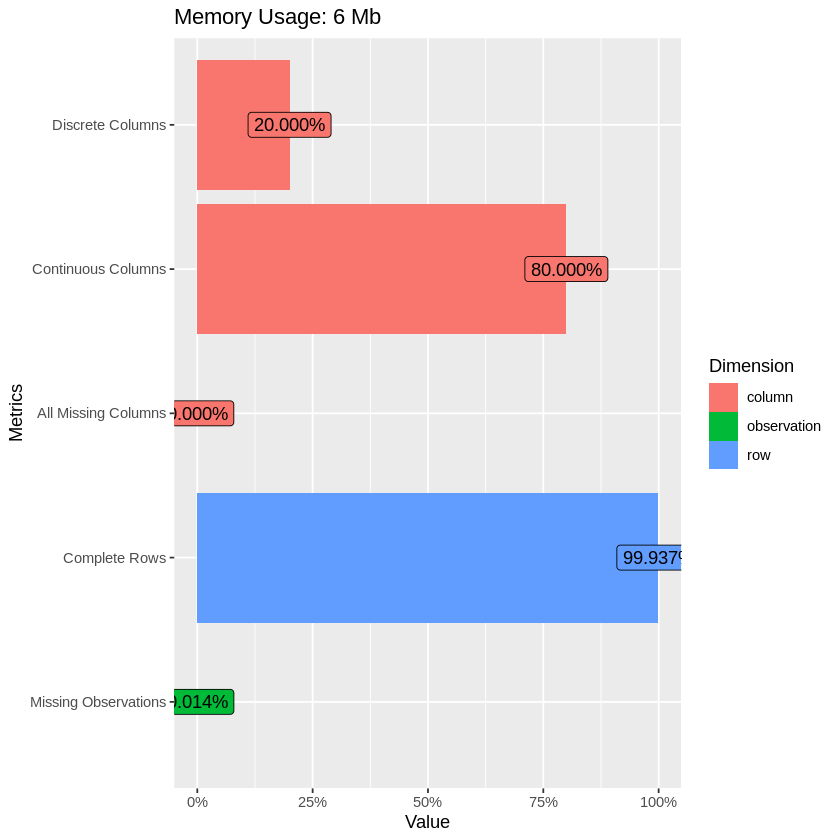

In [19]:
plot_intro(기온) 

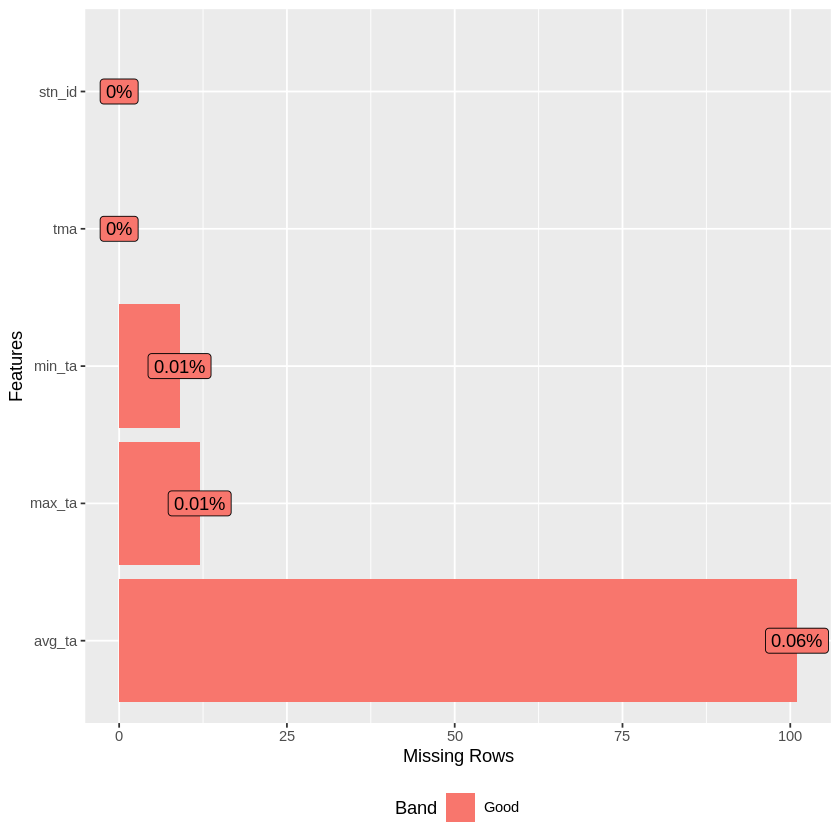

In [20]:
plot_missing(기온)

미씽존재!!

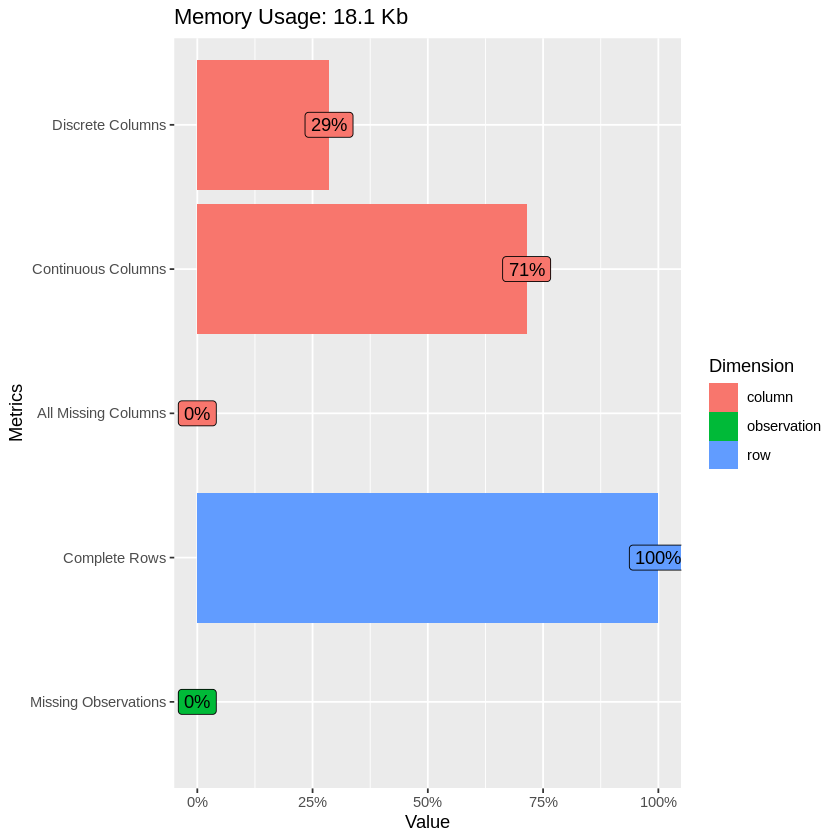

In [31]:
plot_intro(기상관측지점)

In [22]:
기온$stn_id  %>% table 

.
  90   93   95   98   99  100  101  102  104  105  106  108  112  114  115  119 
1827   92 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 121  127  129  130  131  133  135  136  137  138  140  141  143  146  152  155 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827    9 1827 1827 1827 1827 
 156  159  162  165  168  169  170  172  174  175  176  177  184  185  188  189 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827  619  424 1827 1827 1827 1827 
 192  201  202  203  211  212  216  217  221  226  232  235  236  238  243  244 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 245  247  248  251  252  253  254  255  256  257  258  259  260  261  262  263 
1827 1827 1827 1827 1827 1827 1827 1827  184 1827 1827 1827 1827 1827 1827 1827 
 264  266  268  271  272  273  276  277  278  279  281  283  284  285  288  289 
1827 1827  967 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 294  295  864 
1827 1827 

결측치 위치 보기

# 1. 패키지 및 데이터 로드

In [ ]:
system("gdown --id 1fW-c6QeKD39JKGJYc_M9JI0wiNBkbQFC")

In [ ]:
df= read.csv("hospital.csv")

In [ ]:
require(dplyr)
require(magrittr)
require(lubridate)
require(ggplot2)

In [ ]:
#as.data.frame(installed.packages()) %>%
#  filter(grepl("Data", Package) )

In [ ]:
as.data.frame(installed.packages()) %>%
  filter(grepl("lubri", Package))

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
lubridate,lubridate,/usr/lib/R/site-library,1.8.0,NA,"methods, R (>= 3.2)",generics,cpp11 (>= 0.2.7),"covr, knitr, testthat (>= 2.1.0), vctrs (>= 0.3.0), rmarkdown","chron, timeDate, tis, zoo",GPL (>= 2),NA,NA,NA,NA,yes,4.1.1


In [ ]:
install.packages(c("DataExplorer","skimr","ggridges","pacman"))
pacman::p_load("DataExplorer","skimr","ggridges")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’, ‘plyr’




In [ ]:
str(df)

'data.frame':	49674 obs. of  4 variables:
 $ back_hospital.yyyymmdd : int  20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 20120101 ...
 $ back_hospital.area     : chr  "강원" "강원" "경기" "경기" ...
 $ back_hospital.sex      : int  1 2 1 2 1 2 1 2 1 2 ...
 $ back_hospital.frequency: int  3 3 4 5 2 1 6 1 0 2 ...


In [ ]:
glimpse(df)

Rows: 49,674
Columns: 4
$ back_hospital.yyyymmdd  <int> 20120101, 20120101, 20120101, 20120101, 201201…
$ back_hospital.area      <chr> "강원", "강원", "경기", "경기", "경남", "경남"…
$ back_hospital.sex       <int> 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2…
$ back_hospital.frequency <int> 3, 3, 4, 5, 2, 1, 6, 1, 0, 2, 1, 0, 4, 1, 3, 6…


In [ ]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             49674 
Number of columns          4     
_______________________          
Column type frequency:           
  character                1     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 back_hospital.area         0             1   2   2     0       17          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable           n_missing complete_rate        mean        sd       p0
1 back_hospital.yyyymmdd          0             1 20135658.   11189.    20120101
2 back_hospital.sex               0             1        1.5      0.500        1
3 back_hospital.frequency         0             1     

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [ ]:
duplicated(df) %>% sum # 중복없음

[1] 0

1. 4개의 변수는 총 49674(약5만개)의 관측치를 가지고 있음
2. 그 중 타겟(`frequency`)를 제외한 3개 변수는 모두 범주형임.
3. `yyyymmdd` 날짜,`area` 지역(도단위), `sex` 성별
4. `sex`의 mean과 Median을 봤을때 매우 밸런스함
5. 타겟은 min=0, max=13, mean=1.42, Median=1.5 -> 회귀 모델시 로그변환 필요
6. 중복 없음 

### 검증 데이터셋에 맞춰 변수명 변경

In [ ]:
require(stringr)

Loading required package: stringr



In [ ]:
"back_hospital." %>% nchar ->nchar

In [ ]:
names(df)= str_sub(names(df),nchar+1)

In [ ]:
df %>% head # 확인

,yyyymmdd,area,sex,frequency
,<int>,<chr>,<int>,<int>
1,20120101,강원,1,3
2,20120101,강원,2,3
3,20120101,경기,1,4
4,20120101,경기,2,5
5,20120101,경남,1,2
6,20120101,경남,2,1


In [ ]:
write.csv(df, "hospital_rename.csv", row.names=FALSE) 

# 1. BASIC EDA

In [ ]:
introduce(df) %>% str

'data.frame':	1 obs. of  9 variables:
 $ rows                : int 49674
 $ columns             : int 4
 $ discrete_columns    : int 1
 $ continuous_columns  : int 3
 $ all_missing_columns : int 0
 $ total_missing_values: int 0
 $ complete_rows       : int 49674
 $ total_observations  : int 198696
 $ memory_usage        : num 996168
 - attr(*, ".internal.selfref")=<externalptr> 


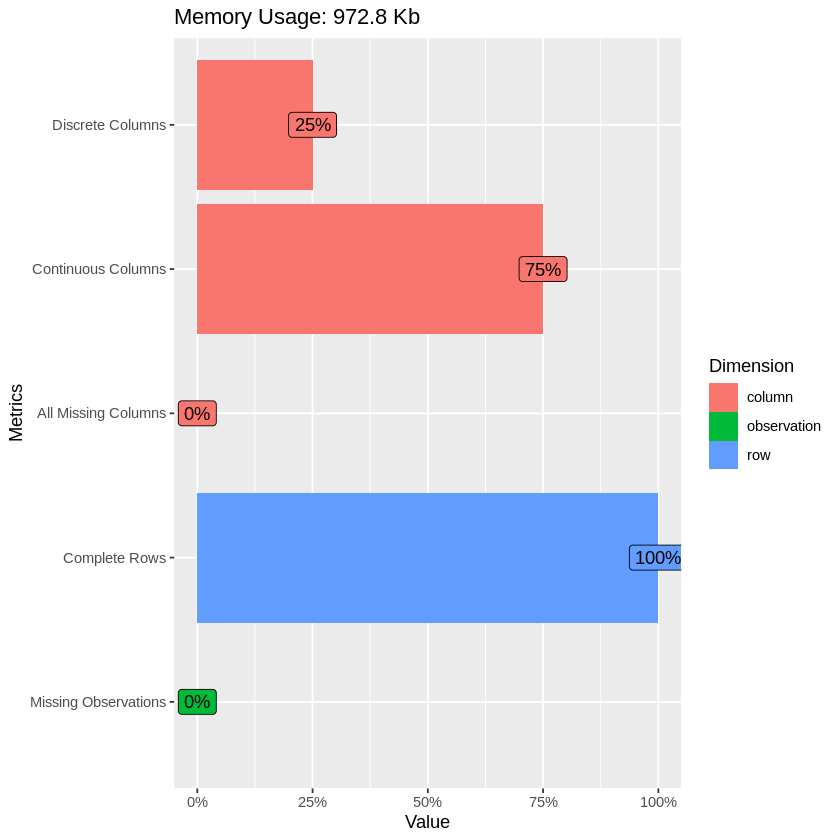

In [ ]:
plot_intro(df) # 미씽 없음 

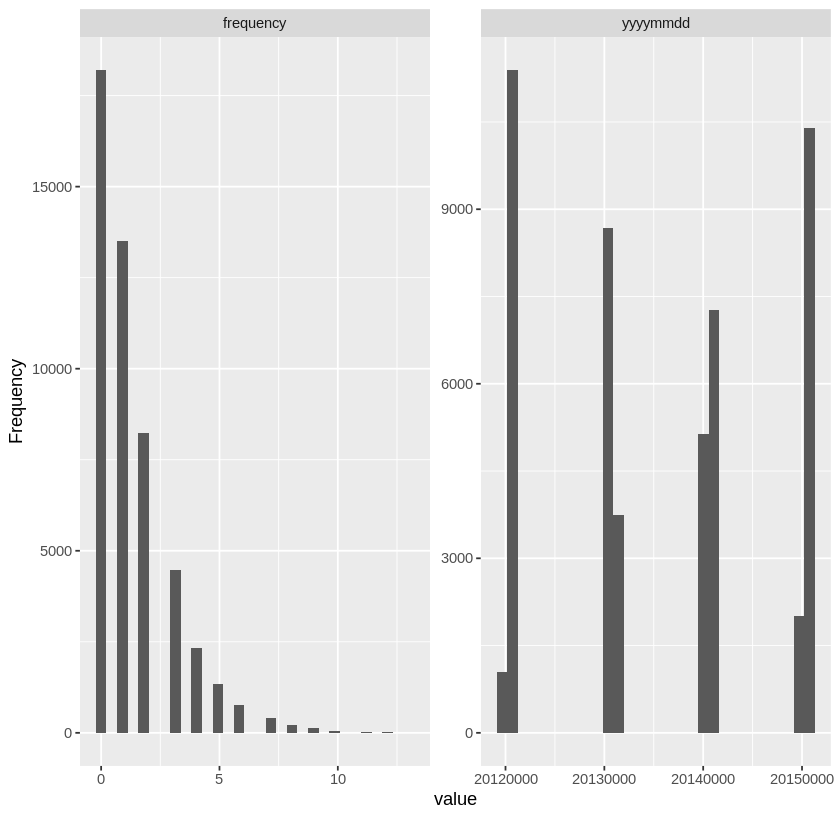

In [ ]:
plot_histogram(df)

앞서 확인한 것과 마찬가지로 0의 빈도가 가장 많음

In [ ]:
#df%>% mutate(frequency=as.factor(frequency)) -> df_target_factor
#df%>% mutate(frequency=as.character(frequency)) -> df_target_char

In [ ]:
#head(df_target_factor)

,yyyymmdd,area,sex,frequency
,<int>,<chr>,<int>,<fct>
1,20120101,강원,1,3
2,20120101,강원,2,3
3,20120101,경기,1,4
4,20120101,경기,2,5
5,20120101,경남,1,2
6,20120101,경남,2,1


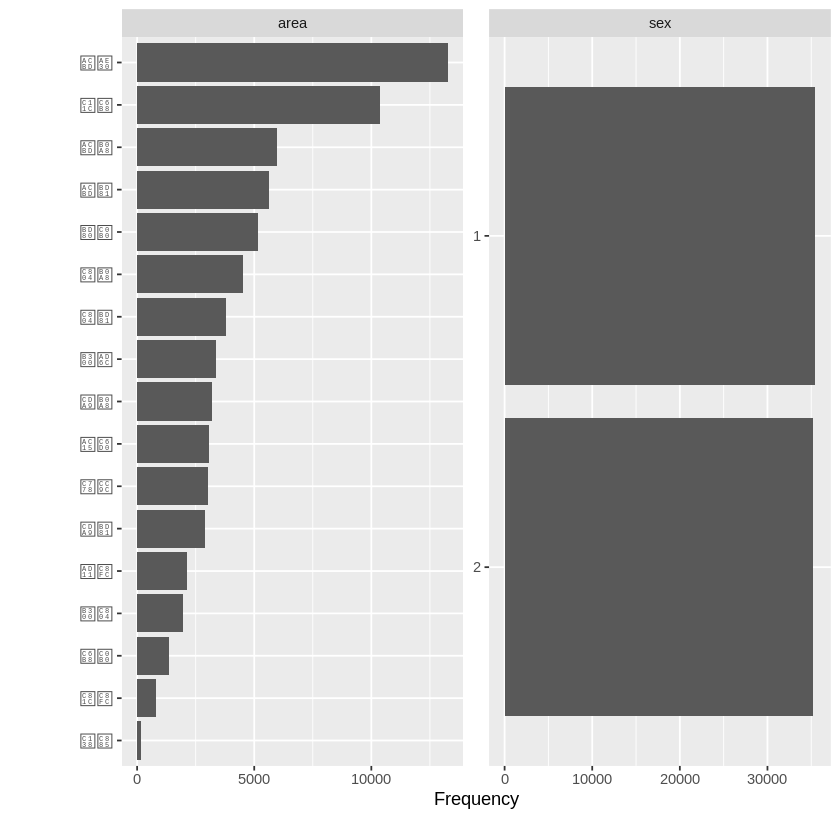

In [ ]:
plot_bar(df, with='frequency')

In [ ]:
table(df$ sex)
table(df$ area)


    1     2 
24837 24837 


강원 경기 경남 경북 광주 대구 대전 부산 서울 세종 울산 인천 전남 전북 제주 충남 
2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 2922 
충북 
2922 

In [ ]:
table(df$frequency)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
18197 13513  8231  4467  2321  1347   756   395   222   132    58    20    10 
   13 
    5 

# 파생변수 - 발생(1) 발생하지 않음(0)

In [ ]:
df %>% filter(frequency !=0) %>% nrow() 
df %>% filter(frequency ==0) %>% nrow()

In [ ]:
df %>% filter(frequency !=0) %>% nrow() / nrow(df) * 100 -> ok
df %>% filter(frequency ==0) %>% nrow()/ nrow(df) * 100 -> no
paste0("발생 비율은 ", round(ok,2), "%"," ","입니다.")
paste0("발생 하지 않은 비율은 ", round(no,2), "%"," ","입니다.")

In [ ]:
df %<>% mutate(event=case_when(frequency == 0 ~ 0 ,
                              TRUE~ 1)
              )

In [ ]:
df %>% group_by(area) %>% 
       summarise(sum_freq=sum(frequency)) %>%
       arrange(-sum_freq)

area,sum_freq
<chr>,<int>
경기,13267
서울,10354
경남,5979
경북,5614
부산,5146
전남,4532
전북,3808
대구,3363
충남,3194


비율을 알아야함. 이거만 봐선 모르겠음

성별은 상관 없어 보임

# 지역별 성별의 차이

In [ ]:
df %>% group_by(area) %>% 
       mutate(area_freq= sum(frequency)) -> df_area

In [ ]:
df %>% group_by(area, sex) %>% 
       mutate(area_sex_freq= sum(frequency))  -> df_area_sex

In [ ]:
require(data.table)

In [ ]:
inner_join(df_area, df_area_sex) %>%
  mutate(prop=area_sex_freq/area_freq *100)  %>% head

In [ ]:
inner_join(df_area, df_area_sex) %>%
  mutate(prop=area_sex_freq/area_freq *100) %>% 
  ungroup %>%
  as.data.table() ->DT

In [ ]:
#DT[ , diff  :=abs( prop - shift(prop) ) , by = area]

In [ ]:
#DT %>% head # 확인
DT[ , .(diff=abs( prop - shift(prop) )%>%round(3) ), by = area] %>% 
  arrange(-diff)%>%
  distinct() %>%
  na.omit()

1. 주어진 기간 내, 지역별로 성별 별 차이가 많은 지역 top3. 세종(14.11), 전북(10.242), 광주(10.169)
- 비교적 연도 별 feq이 적은 편인 지역임, 세종-전북-광주 경도로 내려기는게 이어지는 위치임.
- Q. 세종을 감싸는 충북 충남 대전은 왜??
- 기후 파악이 필수적
2. 주어진 기간 내, 지역별로 성별 별 차이가 없는 지역 top3. 울산(0.29), 대구(1.1), 경북(1.14)
- 역시 경도상 이어짐
3. 결론
- 처음부터 성비가 다른가?
- raw data의 sampling된 성비 비율은 같았음.
- 지역별 특성에는 성별도 포함될 수 있다고 생각함. 성별 데이터 추가로 포함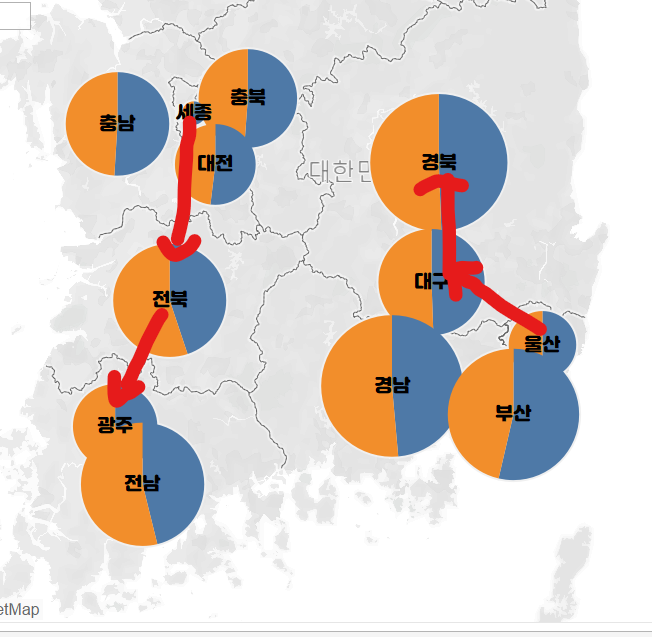


이상 태블로로 확인함

# 파생변수 - 날짜 파싱 

In [ ]:
ymd(df$yyyymmdd) %>% head   #int라서 안먹힘

In [ ]:
#df %>% mutate(yyyymmdd=parse_date_time(yyyymmdd, orders="ymd")) %>%
#  head()
df %<>% mutate(yyyymmdd=parse_date_time(yyyymmdd, orders="ymd"))

In [ ]:
ggplot(df, aes(x = yyyymmdd, y = frequency)) +
  geom_line()

무슨 요일에 많이 발생했는지 궁금

In [ ]:
#require(lubridate) #wday
#?lubridate::wday
#?data.table::wday

In [ ]:
df %>% mutate( year=year(yyyymmdd),
               month=month(yyyymmdd),
               day=day(yyyymmdd),
               yday=yday(yyyymmdd),
               wday=lubridate::wday(yyyymmdd, label=TRUE) ) ->df_date

In [ ]:
df_date %>% head # 확인

In [ ]:
df_date$ year %>% table
df_date$ month %>% table
df_date$ day %>% table

In [ ]:
wday(df$yyyymmdd) %>% table

In [ ]:
xtabs(frequency~wday, df_date) %>% prop.table()*100

In [ ]:
xtabs(frequency~wday+area, data=df_date) %>% prop.table()*100

1. 모든 지역에서 월요일이 가장 높음 하지만 이건 일요일에 병원 문닫는 데도 있어서 그럴 수도

In [ ]:
ggplot(df_date, aes(wday)) +
  geom_bar()

In [ ]:
ggplot(df_date, aes(wday)) +
  geom_bar() +
  facet_wrap(~ frequency, ncol = 1, scale = "free_y")

In [ ]:
ggplot(df_date, aes(wday)) +
  geom_bar()

## month 기준

In [ ]:
ggplot(df_date, aes(x = yday, y = frequency)) +
  geom_line(aes(group = year), alpha = 0.5)

  ### 이거 에스키스로 해보기 ####

## df_date_month 저장 

In [ ]:
df_date %>% mutate(month=lubridate::month(yyyymmdd, label=TRUE)) -> df_date_month

In [ ]:
ggplot(df_date_month, aes(x = frequency, y = month, height = ..density.., fill=area)) +
  geom_density_ridges(stat = "density")

In [ ]:
ggplot(df_date_month, aes(x = frequency, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

간단한 시계열 그래프로 확인 해봐야 할 것 같음 .

In [ ]:
xtabs(frequency~year, df_date)

In [ ]:
with(df_date_month,   table(frequency, month) )

In [ ]:
xtabs(frequency~month, df_date_month)

In [ ]:
#월별 freq
df_date_month %>% group_by(month) %>% 
  summarise(sum_freq=sum(frequency)) %>%
  arrange(-sum_freq)

In [ ]:
#월>일 별 freq
df_date_month %>% group_by(month,day) %>% 
  summarise(sum_freq=sum(frequency)) %>%
  arrange(-sum_freq)
#8월 제외하고 1일에 발생 빈도가 가장 높음

In [ ]:
df_date_month %>% filter(year==2012, month=="Apr", area=="강원") %>% count(sex,wt=event)
df_date_month %>% filter(year==2012, month=="Apr", area=="강원") %>% nrow()
#df_date_month %>% filter(year==2012, month=="Apr", area=="강원")

In [ ]:
df_date_month %>% group_by(month,day) %>% 
  summarise(sum_event=sum(event)) %>%
  arrange(-sum_event)

1. `year` 2015년에 가장 많이 발생(18170) > 2014> 2013> 2012
2. `month` 1월>7월> 12월 ,, 근데 2월 9월 6월 제일 작음

In [ ]:
ggplot(df_date_month, aes(x = frequency, y = wday, height = ..density..)) +
  geom_density_ridges(stat = "density")

In [ ]:
ggplot(df_date_month, aes(x = event, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

In [ ]:
with(df_date_month,   table(event, month) )

## - df_date_month 저장

In [ ]:
write.csv(df_date_month, "df_date_month.csv", row.names=FALSE)

In [ ]:
#발생 했는지 안했는지 
df_date_month %>% group_by(area) %>%
  summarise(days_event= sum(event)) %>%
  arrange(-days_event)

# 발생 빈도 sum 
  df %>% group_by(area) %>% 
       summarise(sum_freq=sum(frequency)) %>%
       arrange(-sum_freq)

강원,인천(빈도수 1차이) 말고 순서 같음

#### _df_anyevent

In [ ]:
#df_date_month %>% group_by(month, yyyymmdd) %>%
#  summarise(any_event= any(event)) ->df_any_event

In [ ]:
#df_any_event %>%  head()

In [ ]:
df_date_month %>% group_by(month) %>%
  summarise(sum_event=sum(event)) %>%
  arrange(-sum_event)

In [ ]:
df_date_month %>% group_by(year) %>%
  count(month,  wt=event, sort=TRUE )

In [ ]:
df_date_month %>% group_by(year,month) %>%
  summarise(sum_event=sum(event)) %>%
  arrange(-sum_event) %>% head()

In [ ]:
#########################
df_any_event %>% 
  summarise(
    days_event = sum(any_event),
  ) %>%
  arrange(-days_event)

In [ ]:
options(dplyr.summarise.inform = FALSE)

df_date_month %>% group_by(year, month) %>%
  summarise(any_event = sum(event)) %>%
  arrange(-any_event)  %>% head(10)

df_date_month %>% group_by(year, month) %>%
  summarise(any_event = sum(event)) %>%
  arrange(any_event)  %>% head(10)

- `가장 많이 발생` (2015년 3/5)
1. 2013년 1월 (694)
2. 2014년 7월
3. 2015년 7월
4. 2015년 10월
5. 2015년 3월
- `가장 적게 발생` - 2월
1. 2014 2월 601
2. 2012 6월 610
3. 2013 2월 613
4. 2015 2월 621
5. 2012 8월 624

# 파생변수 - 성별 없애고 발생 빈도 변수 만들기

In [ ]:
df_date_month %>% head

In [ ]:
df_date_month %>% as.data.table -> DT_date_month

In [ ]:
require(utils)

1월1일까찌만 됨 @@@@@@ 뭐징

In [ ]:
DT_date_month[, freq_no_sex :=  frequency + shift(frequency, fill=NA) , by="area" ] 
#%>%
  #na.omit()
View(DT_date_month)

write.csv( DT_date_month, "DT_date_month.csv"  , row.names=FALSE  )
#DT_date_month %>% head()
#DT_date_month %>% mutate( event_no_sex= case_when (freq_no_sex )
#)

In [ ]:
DT[ , shift(x, fill=x[1L]), by=g]

In [ ]:
DT[ , .( diff=abs(prop-shift(prop)) ), by = area] 

df[행, New 파생컬럼이름 := 연산, by = group 컬럼)

In [ ]:
#DT %>% head # 확인
DT[ , .(diff=abs( prop - shift(prop) )%>%round(3) ), by = area] %>% 
  arrange(-diff)%>%
  distinct() %>%
  na.omit()

In [ ]:
# Create new columns hour, month and rainy
akl_hourly <- akl_hourly %>%
  mutate(
    hour = hour(datetime),
    month = month(datetime, labe=TRUE),
    rainy = weather == "Precipitation"
  )

# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour>=8, hour<=22)

# Summarise for each date if there is any rain
rainy_days <- akl_day %>% 
  group_by(month, date) %>%
  summarise(
    any_rain = any(rainy)
  )

# Summarise for each month, the number of days with rain
rainy_days %>% 
  summarise(
    days_rainy = sum(any_rain)
  )

In [ ]:
###############에스키스
getwd()
setwd("C:/Users/alsdu/Downloads")
df=read.csv("hospital_rename.csv")
library(dplyr)

install.packages("esquisse")
library(esquisse)


esquisser()


End(Not run)

In [ ]:
시간에 따라서 빈도 어떻게 발생하는지
지역에 따라서 빈도 어떻게 발생하는지
